In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
import warnings
warnings.filterwarnings('ignore')

In [2]:
im = cv2.resize(cv2.imread('rik.jpg',0), (512,512))

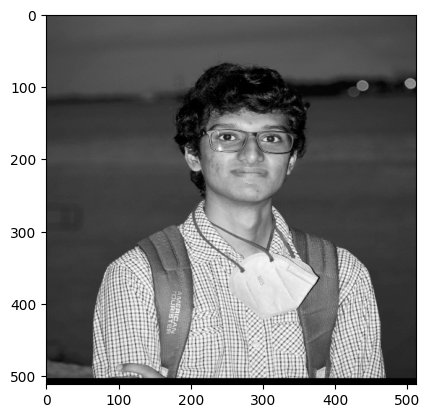

In [3]:
plt.imshow(im,cmap='gray')
plt.show()

In [4]:
pixels=im.reshape(im.size,1)
pixels
k = 5

In [5]:
inertia=[]
for i in range(1,21):
    km=KMeans(n_clusters=i)
    km.fit(pixels)
    inertia.append(km.inertia_)

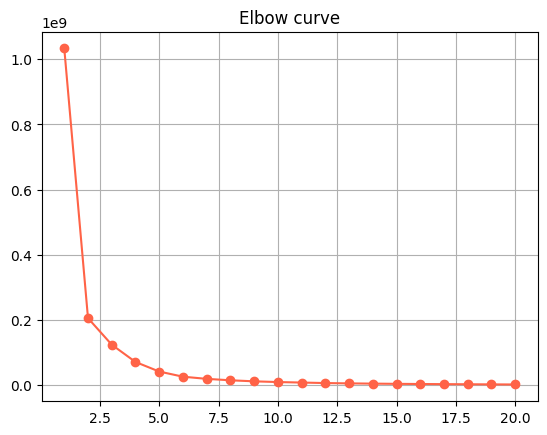

In [6]:
plt.plot(range(1,21),inertia,color='tomato', marker='o')
plt.title('Elbow curve')
plt.grid(True)
plt.show()

In [7]:
km=KMeans(n_clusters=k)

In [8]:
km.fit(pixels)

KMeans(n_clusters=5)

In [9]:
km.inertia_

42248414.56487809

In [10]:
km.labels_

array([0, 0, 0, ..., 3, 3, 3])

In [11]:
pixels.shape

(262144, 1)

In [12]:
df=pd.DataFrame(data=im.ravel(),columns=["Pixel"])
df['Cluster']=km.labels_

In [13]:
df.head()

,Pixel,Cluster
0,69,0
1,71,0
2,70,0
3,70,0
4,70,0


In [14]:
pixrange=[]
for i in range(k):
    m1=df[df.Cluster==i]["Pixel"].max()
    m2=df[df.Cluster==i]["Pixel"].min()
    pixrange.append((m1,m2))

In [15]:
pixrange

[(73, 35), (254, 186), (185, 122), (34, 0), (121, 74)]

In [16]:
def assignnew(x,list1):
     for i in range(len(list1)):
            if x<=list1[i][0] and x>=list1[i][1]:
                return i   

In [17]:
df['Caption']=df['Pixel'].apply(assignnew,args=[pixrange])
df

,Pixel,Cluster,Caption
0,69,0,0
1,71,0,0
2,70,0,0
3,70,0,0
4,70,0,0
...,...,...,...
262139,0,3,3
262140,0,3,3
262141,0,3,3
262142,0,3,3


In [18]:
new_Image = np.array(df['Caption']).reshape(im.shape)

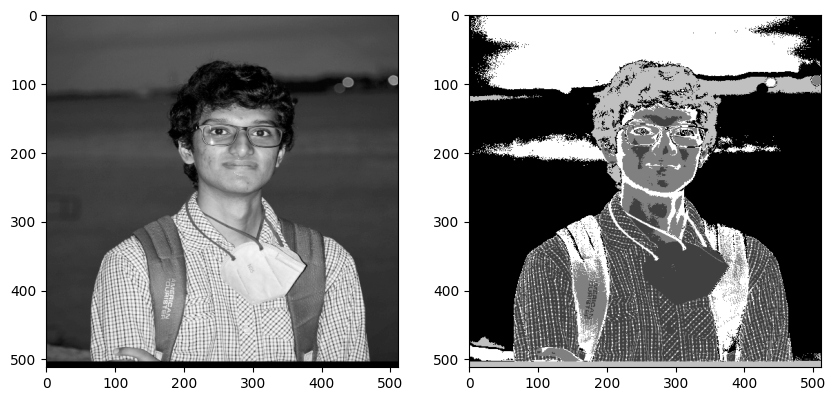

In [19]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(im, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(new_Image, cmap='gray')
plt.show()
           